# ЛАБОРАТОРНАЯ РАБОТА №4

## 1) На произвольный фон наложить произвольное изображение, используя координаты наложения (по центру фона и в произвольной области). Полученные результаты наложения сохранить в отдельные файлы.

In [15]:
from PIL import Image
import random

In [16]:
img1 = Image.open('owl.jpg') # открываем фото 1
img2 = Image.open('mouse.jpg') # открываем фото 2

In [17]:
img2 = img2.resize((200, 200), Image.ANTIALIAS)  # изменяем размер до 200х200, применяем способ сглаживания изображения Image.ANTIALIAS

In [18]:
# записываем позицию по центру (x, y)
position = (int((img1.width-img2.width)/2), int((img1.height-img2.height)/2))

In [19]:
img = img1 # записуем в переменную img открытое фото, которое записано в переменную img1

In [20]:
img.paste(img2, position)#наложение
img.show()
img.save('onCenter.jpg')#сохранить

In [21]:
# задаем позицию произвольно 
x = random.randint(0, img1.size[0]-img2.size[0])
y = random.randint(0, img1.size[1]-img2.size[1])
position = (x, y)

In [22]:
img1 = Image.open('owl.jpg')# открываем фото 1
img = img1 # записуем в переменную img открытое фото, которое записано в переменную img1
img.paste(img2, position)#наложение
img.show()
img.save('onRandom.jpg')#сохранить

In [24]:
#  очистить данные от том, что в переменных img1 и img2 были открыты фото
img1.close() # закрыть
img2.close() # закрыть

## 2) Создать свою маску наложений и применить ее к произвольному изображению или фотографии.

In [40]:
# pip install opencv-contrib-python --upgrade 
# pip install opencv-python 
# conda install opencv 
import cv2 # импорт библиотеки OpenCV
import matplotlib.pyplot as plt

In [6]:
import numpy as np

In [25]:
img1 = cv2.imread('owl.jpg')
img2 = cv2.imread('mouse.jpg')

In [26]:
img2.shape

(728, 1024, 3)

In [27]:
size = (350, 250)
img2 = cv2.resize(img2, size) # маштабирование

In [28]:
img2.shape

(250, 350, 3)

In [22]:
rows, cols, channels = img2.shape # записуем в переменные количество строк столбцов каналов
roi = img1[0:rows, 0:cols] # пиксельный массив
img2gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY) # преобразуем изображение из цветового простанства в ч/б 

In [36]:
img2gray

array([[253, 253, 253, ..., 253, 253, 253],
       [253, 253, 253, ..., 253, 253, 253],
       [253, 253, 253, ..., 253, 253, 253],
       ...,
       [253, 253, 253, ..., 253, 253, 253],
       [253, 253, 253, ..., 253, 253, 253],
       [253, 253, 253, ..., 253, 253, 253]], dtype=uint8)

In [43]:
"""
 threshold функция бинаризации. Бинаризация изображения заключается в том,
 чтобы установить значение серого пикселей на изображении равным 0 или 255,
 что сделает все изображение четким черно-белым.
 Эта функция имеет четыре параметра:
 первый - это исходное изображение,
 второй - порог для классификации,
 третий - новое значение, задаваемое, когда порог выше (ниже),
 а четвертый Один из них - это метод выбора параметров
 cv2.THRESH_BINARY - черно-белое двоичное значение
 порог установлен на 200. Для метода BINARY, когда значение серого на изображении больше 200, значение пикселя сброса равно 255.
"""
ret, mask = cv2.threshold(img2gray, 200, 255, cv2.THRESH_BINARY) # значение, маска

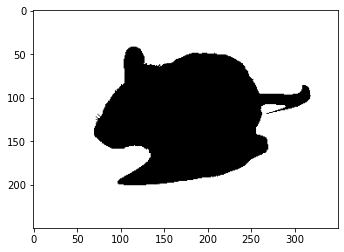

In [44]:
plt.imshow(mask, 'gray')

In [45]:
mask_inv = cv2.bitwise_not(mask) # инверсия

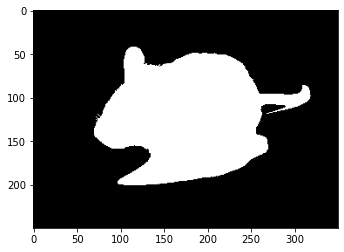

In [46]:
plt.imshow(mask_inv, 'gray')

In [47]:
 # наложение маски на фон
img1_bg = cv2.bitwise_and(roi, roi, mask = mask)

In [33]:
 # получение маски из фона
img2_fg = cv2.bitwise_and(img2, img2, mask = mask_inv)

In [53]:
# сложение
dst = cv2.add(img1_bg, img2_fg)

In [50]:
img1[0:rows, 0:cols] = dst

In [54]:
cv2.imshow('withMask', img1)
cv2.imwrite('result.jpg', img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

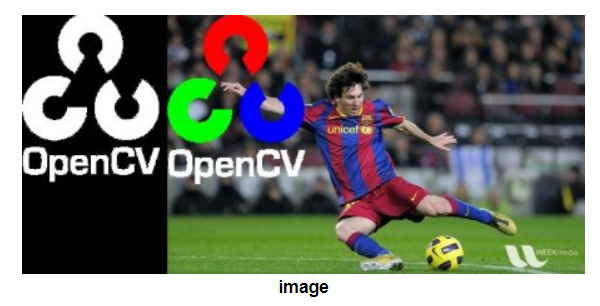

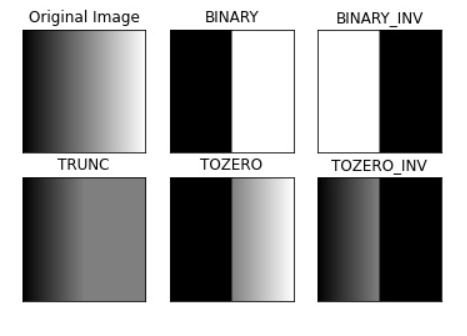

In [ ]:
"""
bitwise_and
Вычисляет для каждого элемента побитовое соединение двух массивов или массива и скаляра.

Параметры:

src1 - первый входной массив или скаляр.
src2 - второй входной массив или скаляр.
src - один входной массив
значение - скалярное значение.
dst - выходной массив того же размера и типа, что и входные массивы.
маска - необязательная маска операции, 8-битный одноканальный массив, который определяет элементы выходного массива, которые необходимо изменить."""

## 3) Выполнить операцию нерезкого маскирования для произвольного цветного и полутонового изображения (размыть исходное изображение, вычесть из исходного изображения размытое (должна увеличиться резкость)).

In [14]:
from PIL import Image, ImageFilter # Импортируем модули Image и ImageFilter из библиотеки PIL
import matplotlib.pylab as plt # Импортируем модуль pylab из библиотеки matplotlib и обзываем его как plt

In [15]:
im = Image.open('owl.jpg')
im2 = im.filter(ImageFilter.UnsharpMask(radius=2, percent=150))
# radius - радиус размытия 2 пикселя
# percent - показывает насколько темнее и насколько светлее становятся границы краев, в % (на картинке показан как Эффект)

In [23]:
imb = Image.open('owl.jpg')
imb = imb.convert('L')
im2b = imb.filter(ImageFilter.UnsharpMask(radius=2, percent=150))

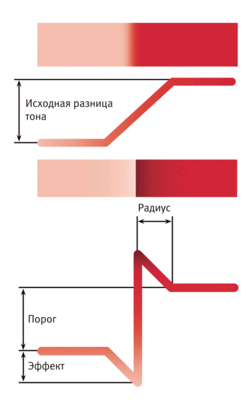

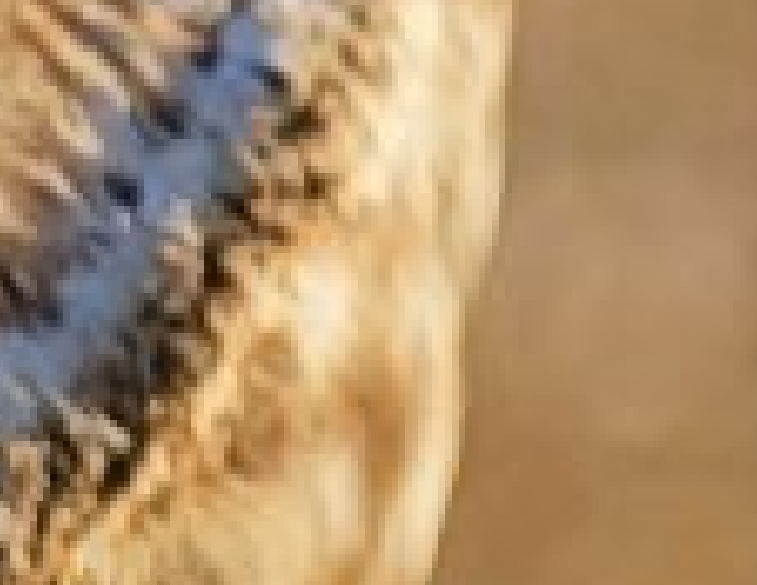

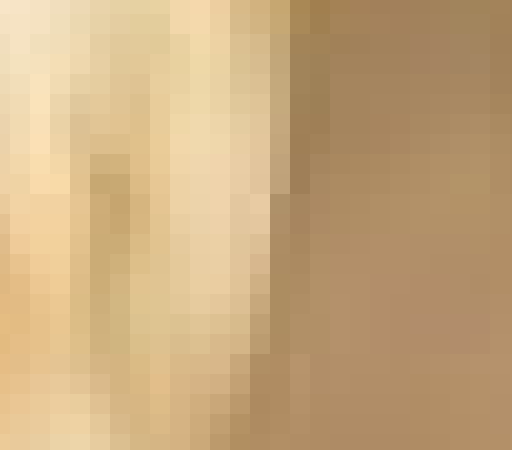

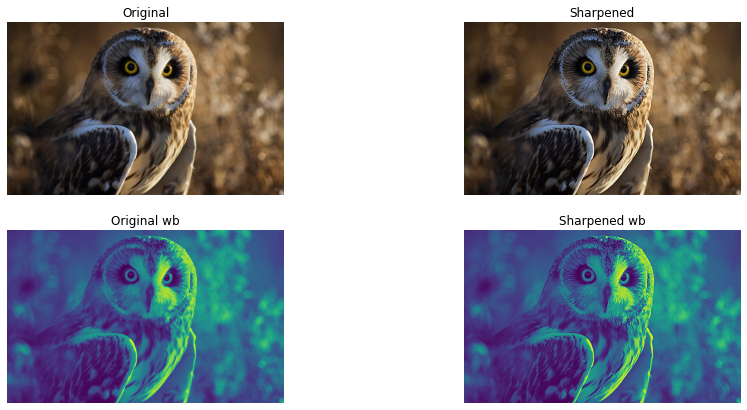

In [33]:
fig = plt.figure(figsize=(15,7))

# cоздаем области для рисунков 
ax_1 = fig.add_subplot(2, 2, 1)
ax_2 = fig.add_subplot(2, 2, 2)
ax_3 = fig.add_subplot(2, 2, 3)
ax_4 = fig.add_subplot(2, 2, 4)

# отобразить картинки
ax_1.imshow(im)
ax_2.imshow(im2)
ax_3.imshow(imb)
ax_4.imshow(im2b)

# отключить оси
ax_1.axis('off')
ax_2.axis('off')
ax_3.axis('off')
ax_4.axis('off')

# установить названия рисунков
ax_1.set(title='Original')
ax_2.set(title='Sharpened')
ax_3.set(title='Original wb')
ax_4.set(title='Sharpened wb')

# fig.set_facecolor('lightgrey')

plt.savefig('LAB_4_p3.jpg') # сохранить изображение
plt.show() # убрать из показа не нужную информацию

## 4) Для произвольного изображения: определить границы с использованием операторов Собеля и Гаусса, сравнить результаты и сделать вывод, построить гистограммы.

In [3]:
import numpy as np # Импортируем библиотеку numpy и обызваем ее np
import matplotlib.pylab as plt # Импортируем модуль pylab из библиотеки matplotlib и обзываем его как plt
from PIL import Image # Импортируем модули Image из библиотеки PIL
from scipy.ndimage import filters

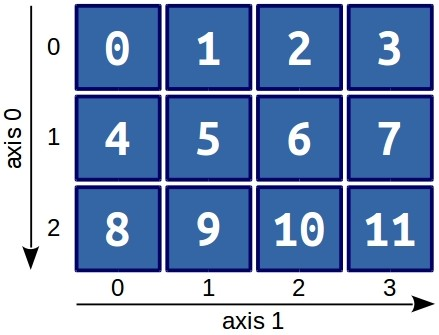

Наиболее общим способом поиска разрывов является обработка изображения с помощью скользящей маски, называемой также фильтром, ядром, окном или шаблоном, которая представляет собой некую квадратную матрицу, соответствующую указанной группе пикселей исходного изображения. Элементы матрицы принято называть коэффициентами. Оперирование такой матрицей в каких-либо локальных преобразованиях называется фильтрацией или пространственной фильтрацией.
При обнаружении перепадов яркости используются дискретные аналоги производных первого

есть сумма произведений коэффициентов маски на значения пикселей непосредственно под маской

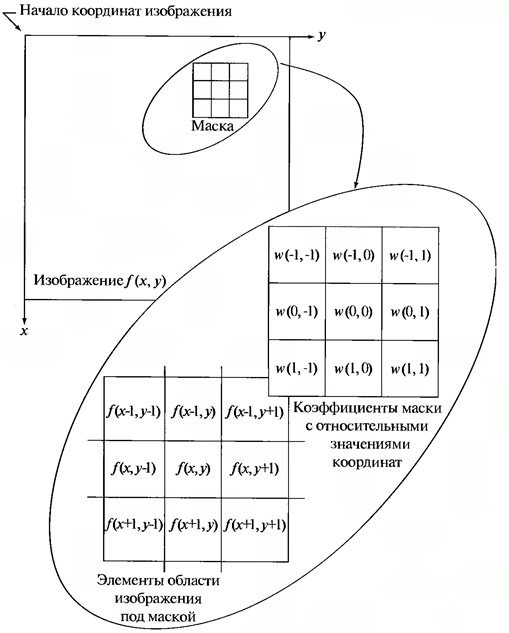

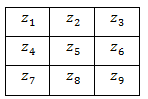

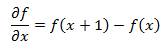

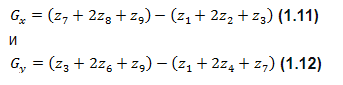

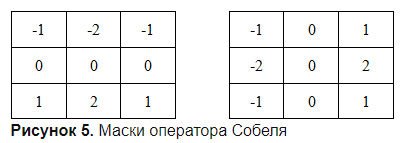

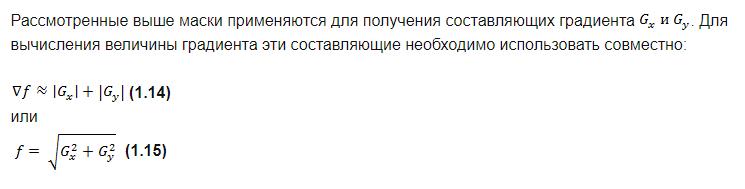

In [10]:
def sobel(img):
    imx = np.zeros(img.shape) # создаем нулевые матрицы размером такие же как и исходная картинка
    imy = np.zeros(img.shape)
    filters.sobel(img, axis=1, output=imx) # производная первого порядка гауссианы по x
    filters.sobel(img, axis=0, output=imy) # производная первого порядка гауссианы по y
    img_s = np.sqrt(imx**2+imy**2) # величина градиента
    return img_s

In [ ]:
"""
sigma - Стандартное отклонение для ядра Гаусса.
Стандартные отклонения фильтра Гаусса приведены для каждой оси в виде последовательности или в виде одного числа,
и в этом случае они равны для всех осей.

order - Порядок фильтра вдоль каждой оси задается в виде последовательности целых чисел или в виде одного числа.
Порядок 0 соответствует свертке с гауссовым ядром.
Положительный порядок соответствует свертке с этой производной гауссова.
"""

In [12]:
def gaus(img):
    imx = np.zeros(img.shape) # создаем нулевые матрицы размером такие же как и исходная картинка
    imy = np.zeros(img.shape)
    filters.gaussian_filter(img, sigma=(1, 1), order=(0, 1), output=imx) # производная первого порядка гауссианы по x
    filters.gaussian_filter(img, sigma=(1, 1), order=(1, 0), output=imy) # производная первого порядка гауссианы по y
    img_g = np.sqrt(imx**2 + imy**2) # величина градиента
    return img_g

In [13]:
img_original = Image.open('owl.jpg').convert('L')
img_original = np.array(img_original)
img_gaus = gaus(img_original)
img_sobel = sobel(img_original)

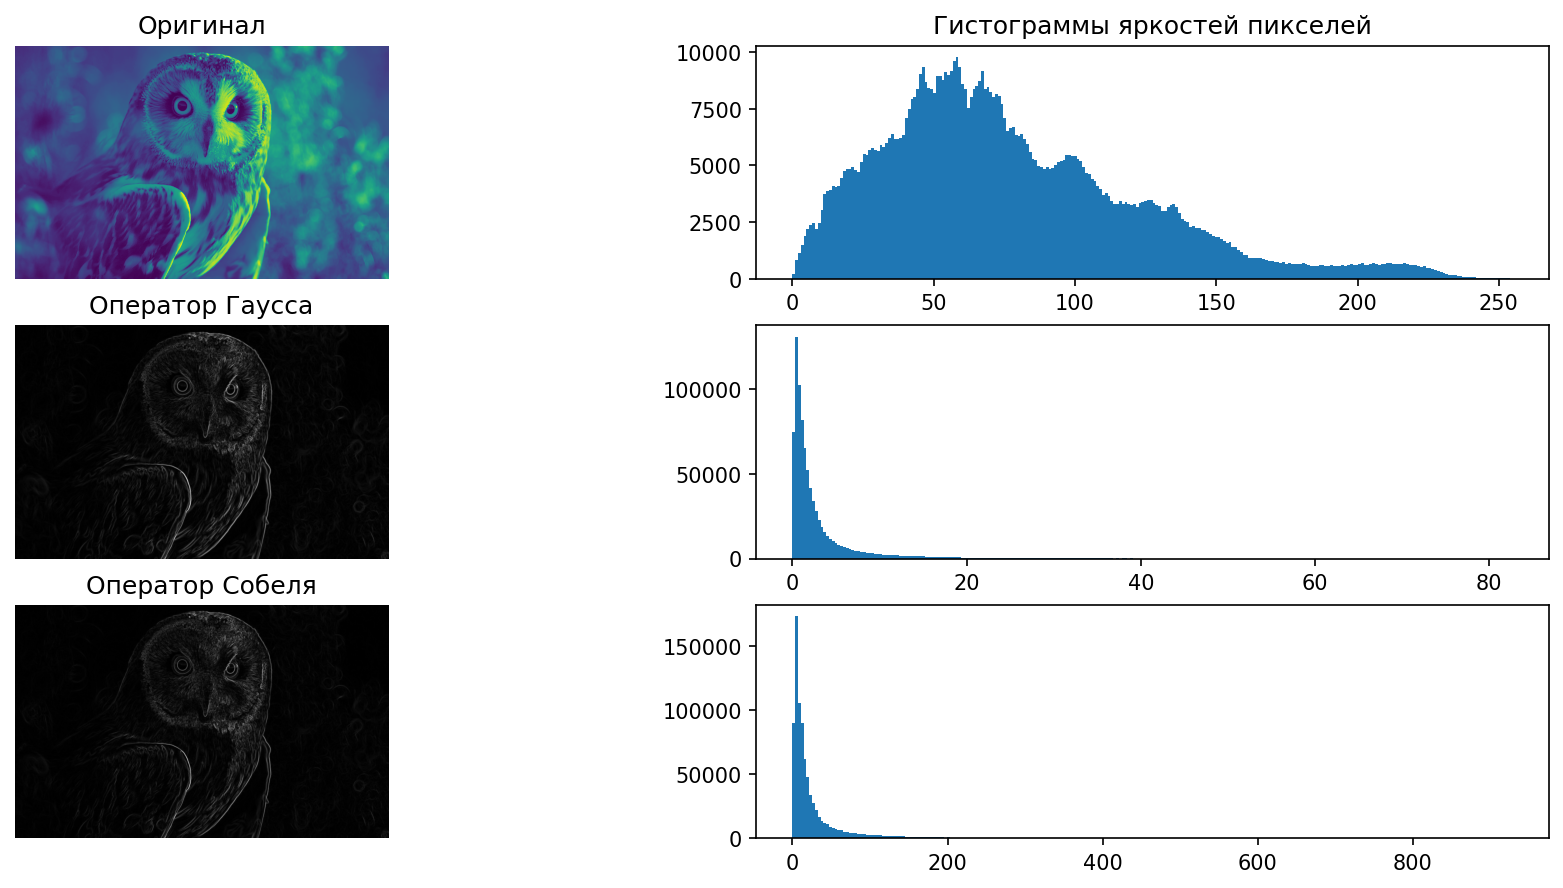

In [15]:
fig = plt.figure(dpi=150, figsize=(15,7))

# cоздаем области для рисунков 
ax_1 = fig.add_subplot(3, 2, 1)
ax_2 = fig.add_subplot(3, 2, 2)
ax_3 = fig.add_subplot(3, 2, 3)
ax_4 = fig.add_subplot(3, 2, 4)
ax_5 = fig.add_subplot(3, 2, 5)
ax_6 = fig.add_subplot(3, 2, 6)

# отобразить картинки
ax_1.imshow(img_original)
ax_2.hist(img_original.flatten(), 256)
ax_3.imshow(img_gaus, cmap=plt.cm.gray)
ax_4.hist(img_gaus.flatten(), 256)
ax_5.imshow(img_sobel, cmap=plt.cm.gray)
ax_6.hist(img_sobel.flatten(), 256)

# отключить оси
ax_1.axis('off')
ax_3.axis('off')
ax_5.axis('off')

# установить названия рисунков
ax_1.set(title='Оригинал')
ax_2.set(title='Гистограммы яркостей пикселей')
ax_3.set(title='Оператор Гаусса')
ax_5.set(title='Оператор Собеля')

plt.savefig('LAB_4_p4.jpg') # сохранить изображение
plt.show() # убрать из показа не нужную информацию

## 5) Определить количество углов на изображении с помощью детектора Харриса.

In [23]:
import cv2
import numpy as np

In [24]:
print(f'Количество углов: {15}')

Количество углов: 15


In [29]:
filename = 'Dodekaehdr.jpg'
img = cv2.imread(filename) dilate #  читаем изображение с помощью метода imread().

In [31]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray

array([[229, 229, 229, ..., 255, 255, 255],
       [229, 229, 229, ..., 255, 255, 255],
       [229, 229, 229, ..., 255, 255, 255],
       ...,
       [210, 210, 210, ..., 235, 235, 235],
       [210, 210, 210, ..., 235, 235, 235],
       [210, 210, 210, ..., 235, 235, 234]], dtype=uint8)

In [32]:
gray = np.float32(gray)
gray

array([[229., 229., 229., ..., 255., 255., 255.],
       [229., 229., 229., ..., 255., 255., 255.],
       [229., 229., 229., ..., 255., 255., 255.],
       ...,
       [210., 210., 210., ..., 235., 235., 235.],
       [210., 210., 210., ..., 235., 235., 235.],
       [210., 210., 210., ..., 235., 235., 234.]], dtype=float32)

In [56]:
"""
img - Входное изображение. Он должен быть в оттенках серого и типа float32.
размер блока - это размер окрестности, учитываемый для определения угла.
ksize - параметр диафрагмы используемой производной Собеля.
свободный параметр детектора к-Харриса в уравнении.
"""
dst = cv2.cornerHarris(gray, 2, 3, 0.07) # Детектор – это метод извлечения особых точек из изображения

In [60]:
dst = cv2.dilate(dst, None) # Дескриптор – идентификатор особой точки.  Передаем изображение и ядро

In [61]:
img[dst > 0.1*dst.max()] = [0, 0, 255]

In [64]:
cv2.imshow('dst', img)
cv2.imwrite('res.jpg', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 6) Определить количество объектов с помощью функции Label.

In [90]:
from scipy.ndimage import measurements
from PIL import Image
import cv2
import numpy as np  

In [97]:
file_name = 'shach.jpeg'
img = cv2.imread(file_name) # читаем изображение с помощью метода imread()
img = np.array(img) # изображение записуем в виде массива пикселей

In [98]:
img = 1 * (img < 200)

In [99]:
result = Image.fromarray(uint8(img * 255)) # получаем изображение из массива

In [100]:
result.save('results.png')

Объект, подобный массиву, который должен быть помечен. Любые ненулевые значения во входных данных считаются объектами, а нулевые значения считаются фоном.
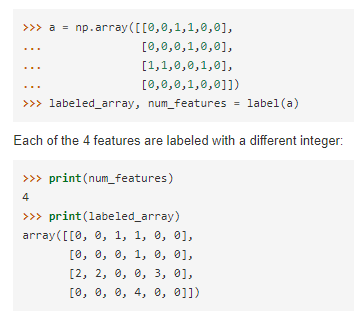

In [103]:
labels, nbr_objects = measurements.label(img)

In [102]:
print(f'Количество объектов на изображении: {nbr_objects}')

Количество объектов на изображении: 8


## 7) Наложить на изображение углы Харриса, центры масс объектов и области SIFT (используя разные цвета)

In [15]:
import cv2
import numpy as np
import imageio as iio
import matplotlib.pyplot as plt
from skimage import filters
from skimage.color import rgb2gray
from skimage.measure import regionprops
from PIL import Image, ImageDraw

In [2]:
def harris(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)
    dst = cv2.cornerHarris(gray, 2, 3, 0.07)
    dst = cv2.dilate(dst, None)
    count = 0
    img[dst > 0.01*dst.max()] = [100, 100, 255]
    return img

In [3]:
def mass(filename):
    image = rgb2gray(iio.imread(filename))
    threshold_value = filters.threshold_otsu(image)
    labeled_foreground = (image > threshold_value).astype(int)
    properties = regionprops(labeled_foreground, image)
    center_of_mass = properties[0].centroid
    return center_of_mass

In [ ]:
# image = rgb2gray(iio.imread(file_name))
# plt.imshow(image, 'Greys')
# threshold_value = filters.threshold_otsu(image)
# image > threshold_value
# (image > threshold_value).astype(int)
# labeled_foreground = (image > threshold_value).astype(int)
# properties = regionprops(labeled_foreground, image)

In [6]:
# читаем изображение с помощью метода imread() библиотеки cv2
file_name = 'Dodekaehdr.jpg'
img = cv2.imread(file_name)

In [8]:
# Ищем центр масс
x, y = mass(file_name)

In [ ]:
# Рисуем на изображении круг в центре масс (в точке х, у)
img = cv2.circle(img, (int(y), int(x)), 5, (255, 0, 255), 5)
# cv2.circle(image, center_coordinates, radius, color, thickness)

In [10]:
# Рисуем на изображении углы Харриса
dst = harris(img)

In [11]:
cv2.imshow('dst', img)
cv2.imwrite('result.jpg',img)
cv2.waitKey(0)
cv2.destroyAllWindows()